In [85]:
import glob
import os
from utils import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from plot_settings import *

from collections import Counter
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [86]:
# Important parameters

reference_pH = 8.5      # used for the calculation of radius and rates
min_radius = 3.4        # minimum droplet size used in the analysis
target_pH = 7.5         # droplets which don't form vacuoles are tracked till this pH

In [87]:
droplets_all = pd.read_csv('trajectory_characterization.csv')
experiments = ['23.11.14-15', '23.12.22-23', '24.04.01', '24.07.08']
asym_expt = ['24.11.09', '24.11.14']
droplets = droplets_all[droplets_all['experiment'].isin(experiments)]

In [88]:
droplets.columns

Index(['particle', 'vacuole', 'radius', 't0', 'tf', 'min_pH', 'initial_pH',
       'pH_vacuole', 'tv', 'pH_vacuole_sigmap', 'pH_vacuole_sigmam',
       'rate(dpHdt)', 'rate_sigma', 'd2pHdt2', 'curvature_param',
       'consider_drop', 'experiment', 'trackID'],
      dtype='object')

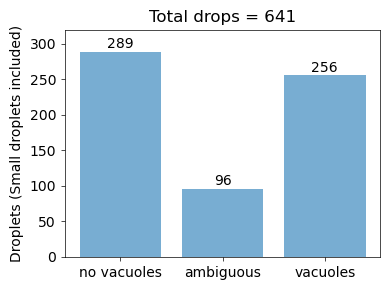

In [89]:

counts = Counter(droplets['vacuole'])

# Define labels and corresponding vacuole values
labels = ['no vacuoles', 'ambiguous', 'vacuoles']
values = [0, 0.5, 1]

# Get counts in the correct order
counts_list = [counts.get(value, 0) for value in values]

# Plotting the bar graph
plt.figure(figsize=(4, 3))
bars = plt.bar(labels, counts_list, alpha=0.6)

# Add value labels on top of each bar
for bar, count in zip(bars, counts_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(count), ha='center', va='bottom')

# Customize the plot
plt.ylabel('Droplets (Small droplets included)')
plt.title(f'Total drops = {len(droplets['vacuole'])}')
plt.ylim(0, max(counts_list) + 30)  
plt.tight_layout()
plt.show()


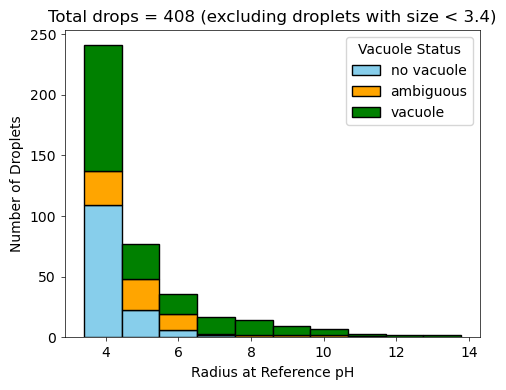

In [90]:
# Filter data to include only radius values greater than 3.4
# mask = np.logical_and(radius_at_ref_pH > min_radius, consider_drop==1)
mask = droplets['radius']> min_radius
filtered_radius = droplets['radius'][mask]
filtered_vacuole = droplets['vacuole'][mask]

# Define vacuole statuses and corresponding labels
vacuole_statuses = [0, 0.5, 1]
vacuole_labels = {0: 'no vacuole', 0.5: 'ambiguous', 1: 'vacuole'}
status_labels = [vacuole_labels[status] for status in vacuole_statuses]

# Define colors for each vacuole status
colors = {0: 'skyblue', 0.5: 'orange', 1: 'green'}
status_colors = [colors[status] for status in vacuole_statuses]

num_bins = 10  # You can adjust the number of bins as needed
bins = np.linspace(filtered_radius.min(), filtered_radius.max(), num_bins + 1)

# Initialize a counts array to hold counts for each vacuole status
counts = np.zeros((len(vacuole_statuses), num_bins))

# Compute histogram counts for each vacuole status
for idx, status in enumerate(vacuole_statuses):
    mask_status = filtered_vacuole == status
    counts[idx], _ = np.histogram(filtered_radius[mask_status], bins=bins)

# Calculate bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2
bar_width = bins[1] - bins[0]  # Width of each bar

# Initialize the bottom positions for stacking bars
bottom = np.zeros(num_bins)

# Create the plot
plt.figure(figsize=(5, 4))

# Plot each vacuole status as a segment in the stacked bar chart
for idx, (counts_status, label, color) in enumerate(zip(counts, status_labels, status_colors)):
    plt.bar(bin_centers, counts_status, width=bar_width, bottom=bottom,
            label=label, color=color, edgecolor='black', align='center')
    bottom += counts_status  # Update the bottom for the next status

# Customize the plot
plt.xlabel('Radius at Reference pH')
plt.ylabel('Number of Droplets')
plt.title(f'Total drops = {filtered_radius.shape[0]} (excluding droplets with size < {min_radius})')
plt.legend(title='Vacuole Status')
plt.tight_layout()

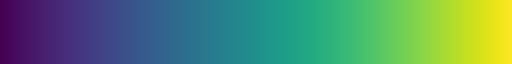

In [91]:
cmap

In [92]:
droplets.columns

Index(['particle', 'vacuole', 'radius', 't0', 'tf', 'min_pH', 'initial_pH',
       'pH_vacuole', 'tv', 'pH_vacuole_sigmap', 'pH_vacuole_sigmam',
       'rate(dpHdt)', 'rate_sigma', 'd2pHdt2', 'curvature_param',
       'consider_drop', 'experiment', 'trackID'],
      dtype='object')

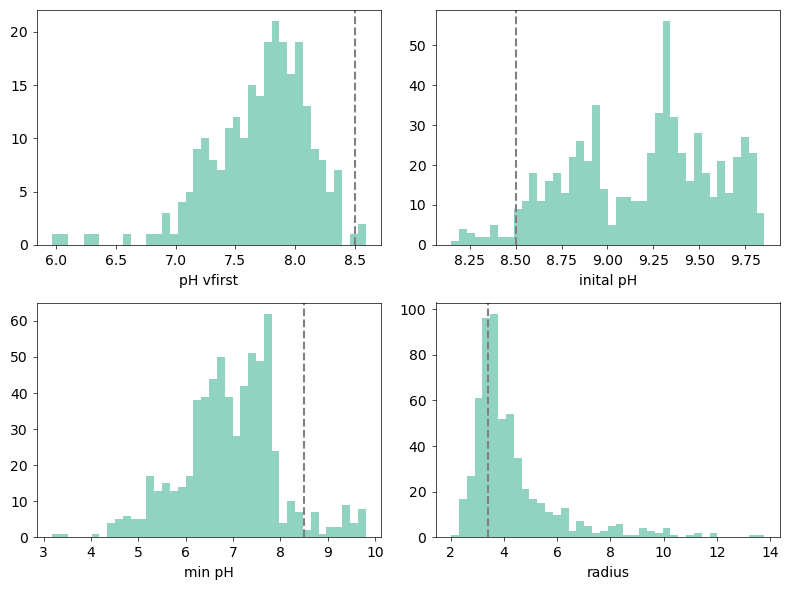

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

ph_vfirst = droplets['pH_vacuole']
ph_vfirst = ph_vfirst[~np.isnan(ph_vfirst)]
ax[0,0].hist(ph_vfirst, edgecolor='none', bins=40, color=cmap(0.6), alpha=0.5)
ax[0,0].set_xlabel('pH vfirst')
ax[0,0].axvline(x=8.5, linestyle='--', color='gray')

ax[0,1].hist(droplets["initial_pH"], edgecolor='none', bins=40, color=cmap(0.6), alpha=0.5)
ax[0,1].set_xlabel('inital pH')
ax[0,1].axvline(x=8.5, linestyle='--', color='gray')

ax[1,0].hist(droplets['min_pH'], edgecolor='none', bins=40, color=cmap(0.6), alpha=0.5)
ax[1,0].set_xlabel('min pH')
ax[1,0].axvline(x=8.5, linestyle='--', color='gray')

ax[1,1].hist(droplets['radius'], edgecolor='none', bins=40, color=cmap(0.6), alpha=0.5)
ax[1,1].set_xlabel('radius')
ax[1,1].axvline(x=3.4, linestyle='--', color='gray')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Figure 1

Option 1 - all drops (the bottom figure is for option 1) 

Option 2 - only the drops which satisfy our analysis criteria 

In [94]:
droplet_df = pd.read_csv(f'droplet_data_combined.csv')  # old data without ~30ish new analyzed droplets

Rates - Exp 0 - 23.11.14-15  (112,)
Rates - Exp 1 - 23.12.22-23  (20,)
Rates - Exp 2 - 24.04.01  (50,)
Rates - Exp 3 - 24.07.08  (59,)
Radius - Exp 23.11.14-15  (113,)
Radius - Exp 23.12.22-23  (20,)
Radius - Exp 24.04.01  (50,)
Radius - Exp 24.07.08  (59,)
pH_v - Exp 23.11.14-15  (113,)
pH_v - Exp 23.12.22-23  (9,)
pH_v - Exp 24.04.01  (26,)
pH_v - Exp 24.07.08  (46,)


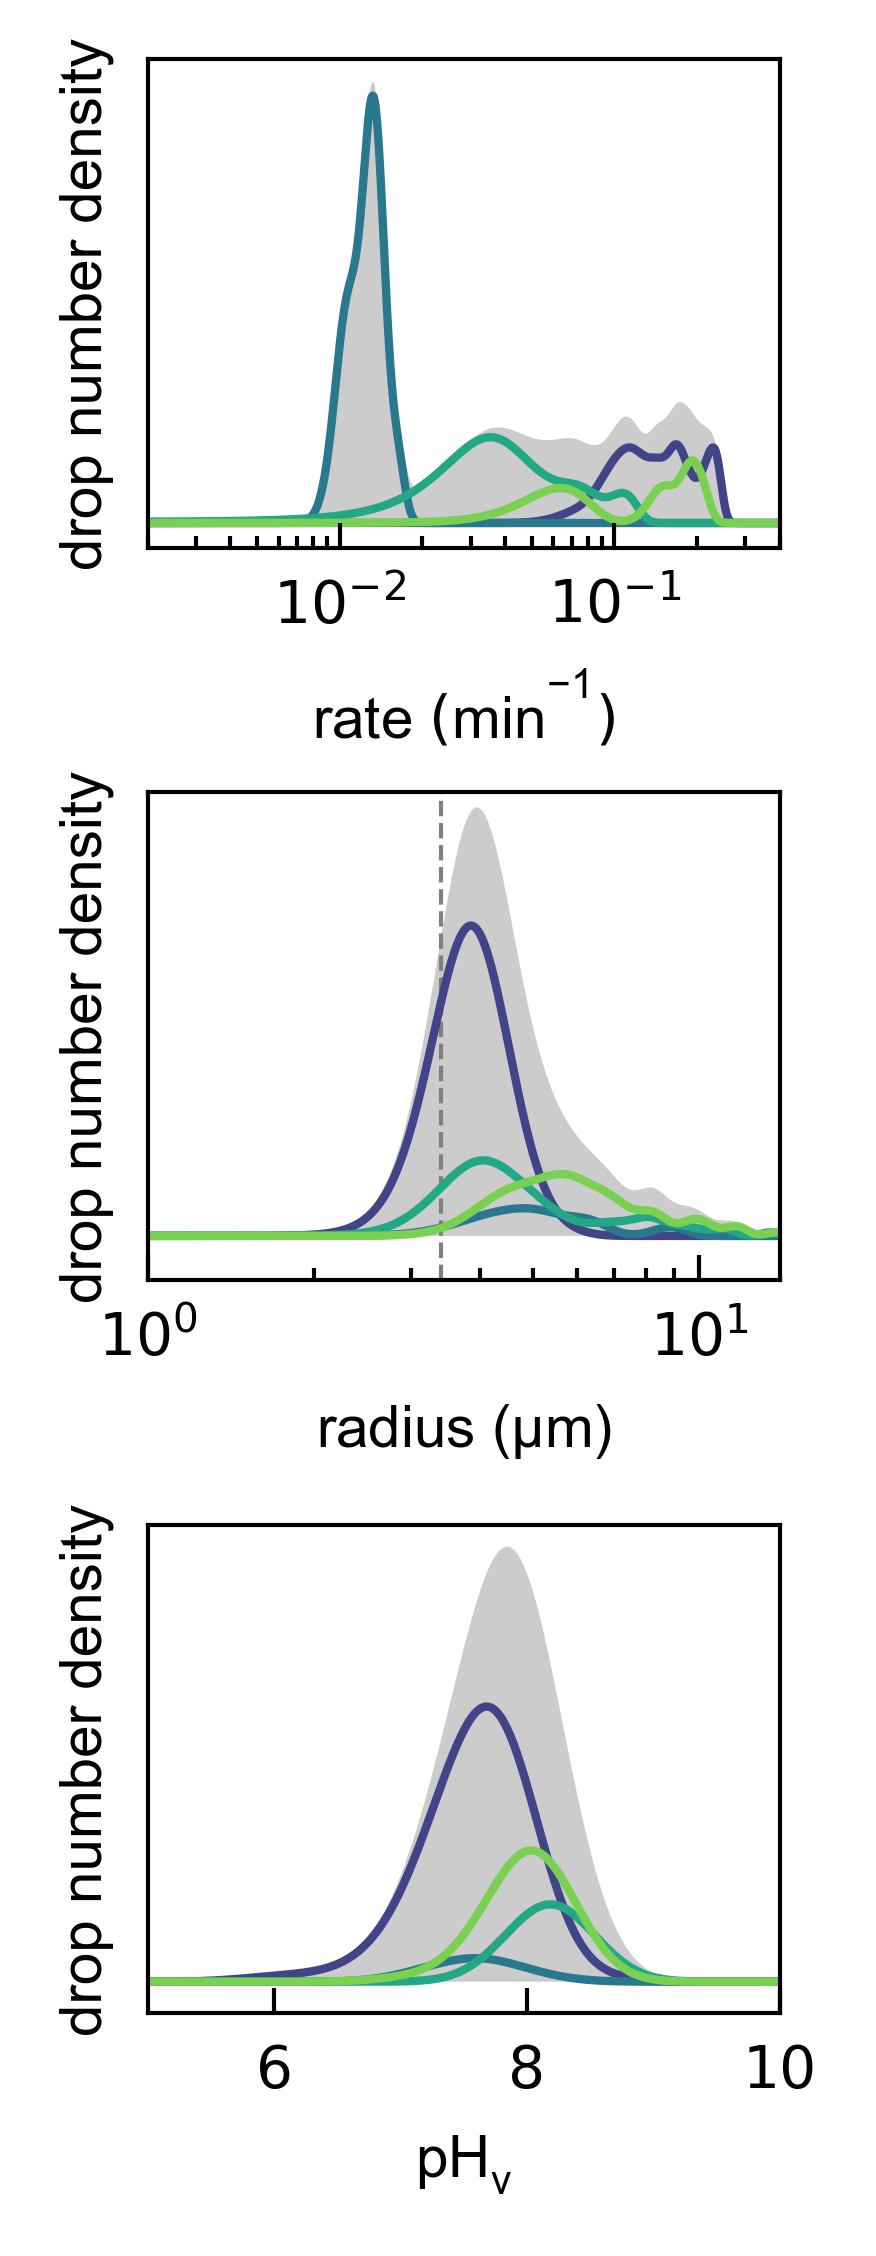

In [95]:
fixed_width = 1.4
tentative_height = 1.1*3 + 0.2*2

color_palette = sns.color_palette("viridis", 4)

fig, ax = plt.subplots(nrows=3, figsize=(fixed_width, tentative_height), dpi=600)

label = ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4']

bw = [0.01,0.001,0.01,0.014]
all = []
for i, exp in enumerate(experiments):
    X = droplet_df[droplet_df['experiment'] == exp]['rate(dpHdt)'].dropna().values
    print(f'Rates - Exp {i} - {exp}  {X.shape}')
    X = -X*60       # rate in min-1
    X = np.concatenate((X,-X))
    kde = KernelDensity(kernel='gaussian', bandwidth=bw[i]).fit(X.reshape(-1,1))
    x_plot = np.logspace(-3, 0, 10000)[:,np.newaxis]
    log_den = kde.score_samples(x_plot)
    ax[0].plot(x_plot[:,0], X.shape[0]*np.exp(log_den), color=color_palette[i], label=label[i], linewidth=1)
    all.append(X.shape[0]*np.exp(log_den))

all = np.sum(np.array(all), axis=0)
# ax[0].legend(fontsize=7)
ax[0].fill_between(x_plot[:,0], all, np.zeros_like(all), color='gray', alpha=0.4, ec='none', zorder=0)
ax[0].set_xlabel(r'rate $(\mathregular{min^{-1}})$', fontsize=7, fontname="Arial")
ax[0].set_ylabel('drop number density', fontsize=7, fontname="Arial")
ax[0].set_xlim([2e-3,0.4])
ax[0].set_ylim(bottom=-250)
ax[0].tick_params(labelsize=7)
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='both', direction='in')
ax[0].yaxis.set_zorder(10)
ax[0].xaxis.set_zorder(10)


all = []
# bw = [0.03,0.003,0.012,0.015]
range = [(1,14),(1,14),(1,14),(1,14)]
ax[1].axvline(x=3.4, color='gray', linestyle='--', linewidth=0.5)
for i, exp in enumerate(experiments):
    X = droplet_df[droplet_df['experiment'] == exp]['radius'].dropna().values
    print(f'Radius - Exp {exp}  {X.shape}')
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X.reshape(-1,1))
    x_plot = np.linspace(range[i][0], range[i][1], 1000)[:,np.newaxis]
    log_den = kde.score_samples(x_plot)
    ax[1].plot(x_plot[:,0], X.shape[0]*np.exp(log_den), color=color_palette[i], linewidth=1)
    all.append(X.shape[0]*np.exp(log_den))


all = np.sum(np.array(all), axis=0)
ax[1].fill_between(x_plot[:,0], all, np.zeros_like(all), color='gray', alpha=0.4, ec='none')
ax[1].set_xlabel(r'radius ($\mathregular{\mu m}$)', fontsize=7, fontname="Arial")
ax[1].set_ylabel('drop number density', fontsize=7, fontname="Arial")
ax[1].set_xlim([1.,14])
ax[1].set_ylim(top=100)
ax[1].tick_params(labelsize=7)
ax[1].tick_params(axis='both', which='both', direction='in')
ax[1].set_xscale('log')
ax[1].yaxis.set_zorder(2)
ax[1].set_ylim(bottom=-10)


all = []
for i, exp in enumerate(experiments):
    X = droplet_df[droplet_df['experiment'] == exp]['pH_vacuole'].dropna().values
    print(f'pH_v - Exp {exp}  {X.shape}')
    kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(X.reshape(-1,1))
    x_plot = np.linspace(4, 14, 1000)[:,np.newaxis]
    log_den = kde.score_samples(x_plot)
    ax[2].plot(x_plot[:,0], X.shape[0]*np.exp(log_den), color=color_palette[i], label=label[i], linewidth=1)
    all.append(X.shape[0]*np.exp(log_den))
all = np.sum(np.array(all), axis=0)
ax[2].fill_between(x_plot[:,0], all, np.zeros_like(all), color='gray', alpha=0.4, ec='none')
ax[2].set_xlabel(r'$\mathregular{pH_v}$', fontsize=7, fontname="Arial")
ax[2].set_ylabel('drop number density', fontsize=7, fontname="Arial")
ax[2].set_xlim([5,10])
ax[2].tick_params(labelsize=7)
# ax[2].set_ylim(0,25)
ax[2].tick_params(axis='both', which='both', direction='in')
ax[2].yaxis.set_zorder(2)
ax[2].set_ylim(bottom=-12)
# ax[2].legend(fontsize=5)

for a in ax:
    a.tick_params(axis='y',          # Apply to the y-axis
                  which='both',      # Major and minor ticks
                  left=False,        # Hide ticks on the left
                  right=False,       # Hide ticks on the right
                  labelleft=False)   # Hide tick labels on the left


plt.tight_layout(pad=0.5)

current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)

plt.savefig('Plots/Fig 2 distributions v4.svg', format='svg')
plt.savefig('Plots/Fig 2 distributions v4.pdf', format='pdf')
plt.savefig('Plots/Fig 2 distributions v4.png', format='png')


Rates - Exp 0 - 23.11.14-15  (231,)
Rates - Exp 1 - 23.12.22-23  (22,)
Rates - Exp 2 - 24.04.01  (57,)
Rates - Exp 3 - 24.07.08  (65,)
Radius - Exp 23.11.14-15  (339,)
Radius - Exp 23.12.22-23  (38,)
Radius - Exp 24.04.01  (110,)
Radius - Exp 24.07.08  (95,)
pH_v - Exp 23.11.14-15  (174,)
pH_v - Exp 23.12.22-23  (9,)
pH_v - Exp 24.04.01  (26,)
pH_v - Exp 24.07.08  (46,)


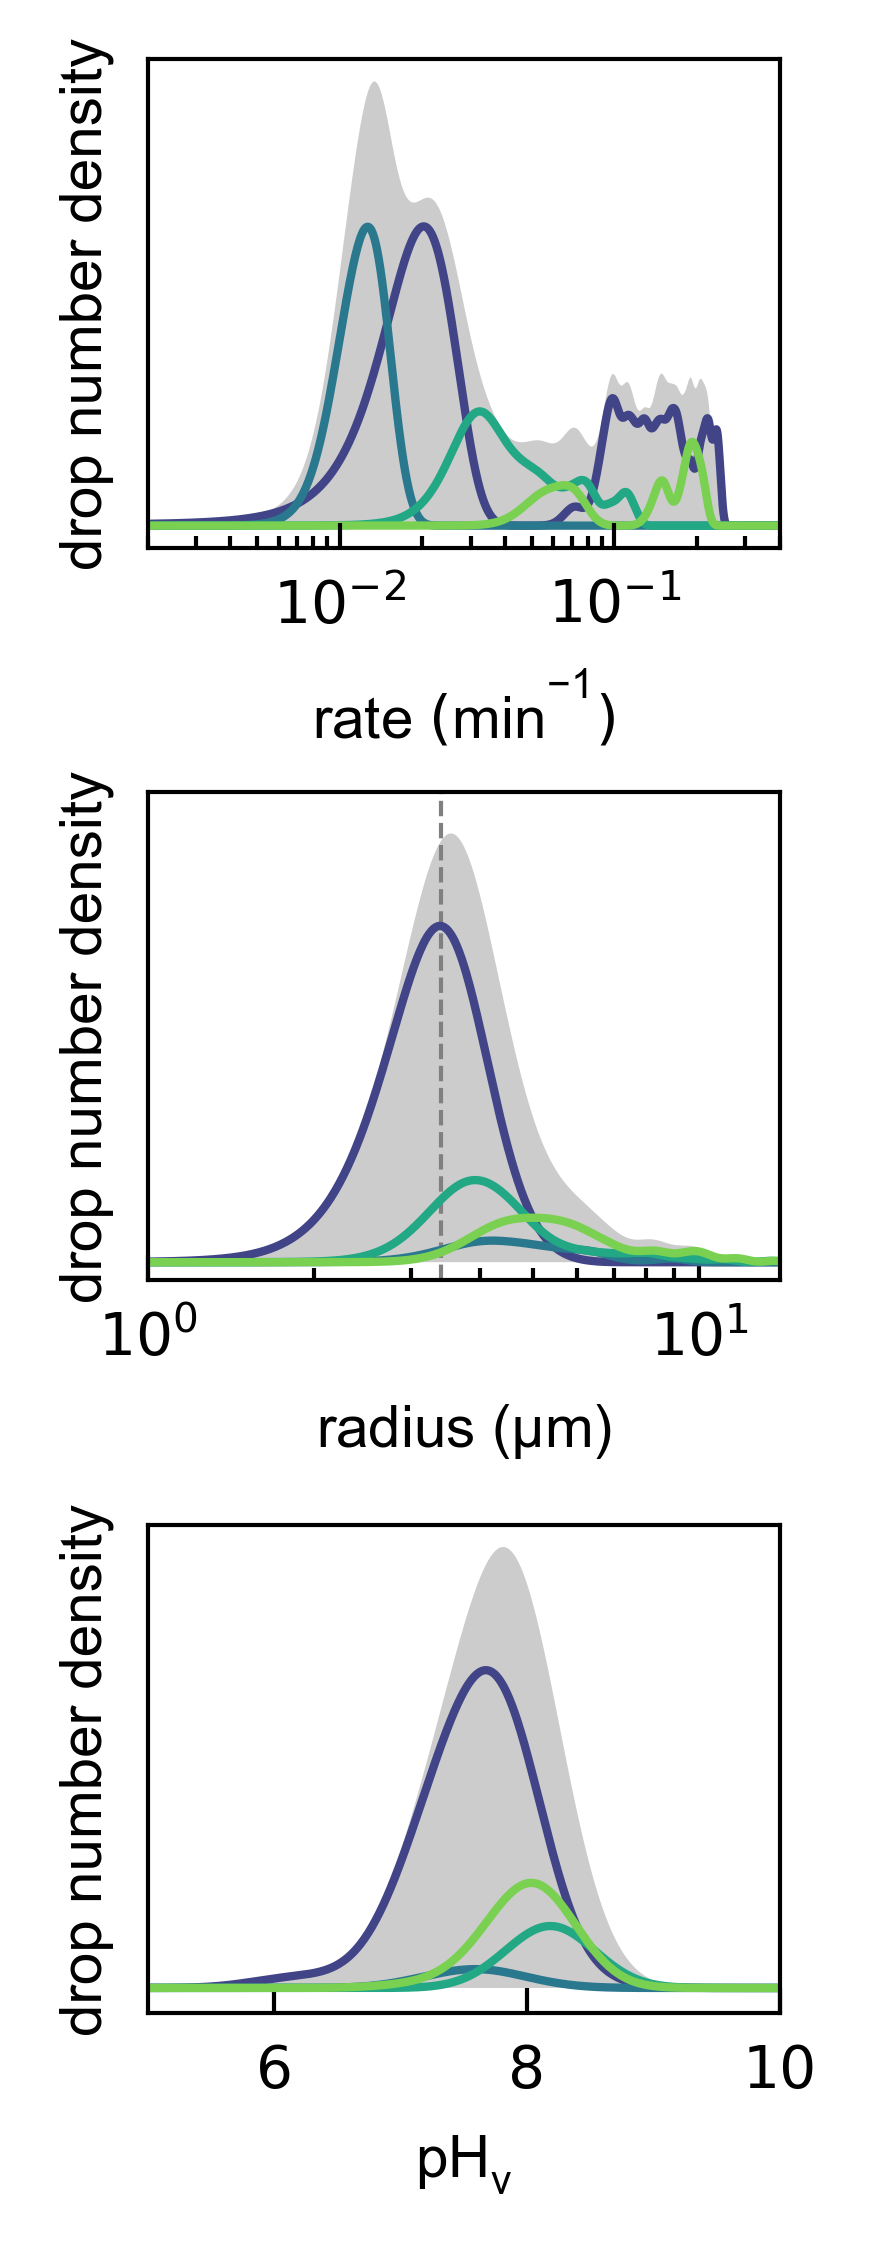

In [96]:
fixed_width = 1.4
tentative_height = 1.1*3 + 0.2*2

color_palette = sns.color_palette("viridis", 4)

fig, ax = plt.subplots(nrows=3, figsize=(fixed_width, tentative_height), dpi=600)

label = ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4']

bw = [0.005,0.0018,0.006,0.008]
all = []
for i, exp in enumerate(experiments):
    X = droplets[droplets['experiment'] == exp]['rate(dpHdt)'].dropna().values
    print(f'Rates - Exp {i} - {exp}  {X.shape}')
    X = -X*60       # rate in min-1
    X = np.concatenate((X,-X))
    kde = KernelDensity(kernel='gaussian', bandwidth=bw[i]).fit(X.reshape(-1,1))
    x_plot = np.logspace(-3, 0, 10000)[:,np.newaxis]
    log_den = kde.score_samples(x_plot)
    ax[0].plot(x_plot[:,0], X.shape[0]*np.exp(log_den), color=color_palette[i], label=label[i], linewidth=1)
    all.append(X.shape[0]*np.exp(log_den))

all = np.sum(np.array(all), axis=0)
# ax[0].legend(fontsize=7)
ax[0].fill_between(x_plot[:,0], all, np.zeros_like(all), color='gray', alpha=0.4, ec='none', zorder=0)
ax[0].set_xlabel(r'rate $(\mathregular{min^{-1}})$', fontsize=7, fontname="Arial")
ax[0].set_ylabel('drop number density', fontsize=7, fontname="Arial")
ax[0].set_xlim([2e-3,0.4])
ax[0].set_ylim(bottom=-250)
ax[0].tick_params(labelsize=7)
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='both', direction='in')
ax[0].yaxis.set_zorder(10)
ax[0].xaxis.set_zorder(10)


all = []
# bw = [0.03,0.003,0.012,0.015]
range = [(1,14),(1,14),(1,14),(1,14)]
ax[1].axvline(x=3.4, color='gray', linestyle='--', linewidth=0.5)
for i, exp in enumerate(experiments):
    X = droplets[droplets['experiment'] == exp]['radius'].dropna().values
    print(f'Radius - Exp {exp}  {X.shape}')
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X.reshape(-1,1))
    x_plot = np.linspace(range[i][0], range[i][1], 1000)[:,np.newaxis]
    log_den = kde.score_samples(x_plot)
    ax[1].plot(x_plot[:,0], X.shape[0]*np.exp(log_den), color=color_palette[i], linewidth=1)
    all.append(X.shape[0]*np.exp(log_den))


all = np.sum(np.array(all), axis=0)
ax[1].fill_between(x_plot[:,0], all, np.zeros_like(all), color='gray', alpha=0.4, ec='none')
ax[1].set_xlabel(r'radius ($\mathregular{\mu m}$)', fontsize=7, fontname="Arial")
ax[1].set_ylabel('drop number density', fontsize=7, fontname="Arial")
ax[1].set_xlim([1.,14])
ax[1].set_ylim(top=260)
ax[1].tick_params(labelsize=7)
ax[1].tick_params(axis='both', which='both', direction='in')
ax[1].set_xscale('log')
ax[1].yaxis.set_zorder(2)
ax[1].set_ylim(bottom=-10)


all = []
for i, exp in enumerate(experiments):
    X = droplets[droplets['experiment'] == exp]['pH_vacuole'].dropna().values
    print(f'pH_v - Exp {exp}  {X.shape}')
    kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(X.reshape(-1,1))
    x_plot = np.linspace(4, 14, 1000)[:,np.newaxis]
    log_den = kde.score_samples(x_plot)
    ax[2].plot(x_plot[:,0], X.shape[0]*np.exp(log_den), color=color_palette[i], label=label[i], linewidth=1)
    all.append(X.shape[0]*np.exp(log_den))
all = np.sum(np.array(all), axis=0)
ax[2].fill_between(x_plot[:,0], all, np.zeros_like(all), color='gray', alpha=0.4, ec='none')
ax[2].set_xlabel(r'$\mathregular{pH_v}$', fontsize=7, fontname="Arial")
ax[2].set_ylabel('drop number density', fontsize=7, fontname="Arial")
ax[2].set_xlim([5,10])
ax[2].tick_params(labelsize=7)
# ax[2].set_ylim(0,25)
ax[2].tick_params(axis='both', which='both', direction='in')
ax[2].yaxis.set_zorder(2)
ax[2].set_ylim(bottom=-12)
# ax[2].legend(fontsize=5)

for a in ax:
    a.tick_params(axis='y',          # Apply to the y-axis
                  which='both',      # Major and minor ticks
                  left=False,        # Hide ticks on the left
                  right=False,       # Hide ticks on the right
                  labelleft=False)   # Hide tick labels on the left


plt.tight_layout(pad=0.5)

current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)

# plt.savefig('Fig 2 distributions v4.svg', format='svg')
# plt.savefig('Fig 2 distributions v4.pdf', format='pdf')
# plt.savefig('Fig 2 distributions v4.png', format='png')


# Regression Surface

- adding experimental categorical variable

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [99]:
# Filtering droplets
particles_to_keep = droplets[(droplets['radius'] > min_radius) & droplets['consider_drop']==1]['particle'].unique()
filtered_drops = droplets[droplets['particle'].isin(particles_to_keep)].copy()

fitting_df = filtered_drops.dropna(subset=['radius', 'rate(dpHdt)', 'pH_vacuole'])
fitting_df = fitting_df.loc[fitting_df['pH_vacuole'] > 7.].reset_index(drop=True)

# Extract features and target variable
X = fitting_df[['radius', 'rate(dpHdt)']]
y = fitting_df['pH_vacuole']

# Create polynomial features up to degree 2 (quadratic)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Get the names of the new features for reference
feature_names = poly.get_feature_names_out(['radius', 'rate(dpHdt)'])

# Create dummy variables for the 'experiment' categorical variable
experiment_dummies = pd.get_dummies(fitting_df['experiment'])

# Concatenate polynomial features with experiment dummies
X_full = np.concatenate([X_poly, experiment_dummies.values], axis=1)

# Update feature names to include experiment dummies
dummy_names = experiment_dummies.columns.tolist()
feature_names_full = feature_names.tolist() + dummy_names

# Fit the regression model with experiment-specific intercepts
model = LinearRegression()
model.fit(X_full, y)

# Retrieve the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Map feature names to coefficients
coefficients_dict = dict(zip(feature_names_full, coefficients))

# Identify dummy variable coefficients
dummy_coefficients = {name: coefficients_dict[name] for name in dummy_names}

# Print the model equation
print("Quadratic Regression Model with Experiment-Specific Intercepts:")
terms = [f"({coef:.4f}) * {name}" for coef, name in zip(coefficients, feature_names_full)]
equation = "pH_vacuole = " + " + ".join(terms) + f" + ({intercept:.4f})"
print(equation)


Quadratic Regression Model with Experiment-Specific Intercepts:
pH_vacuole = (0.2892) * radius + (-765.1601) * rate(dpHdt) + (-0.0100) * radius^2 + (21.5477) * radius rate(dpHdt) + (-77429.5721) * rate(dpHdt)^2 + (-0.2992) * 23.11.14-15 + (0.2431) * 23.12.22-23 + (0.3316) * 24.04.01 + (-0.2756) * 24.07.08 + (5.6960)


Overall Mean Squared Error (MSE): 0.0154
Overall Coefficient of Determination (R²): 0.8504


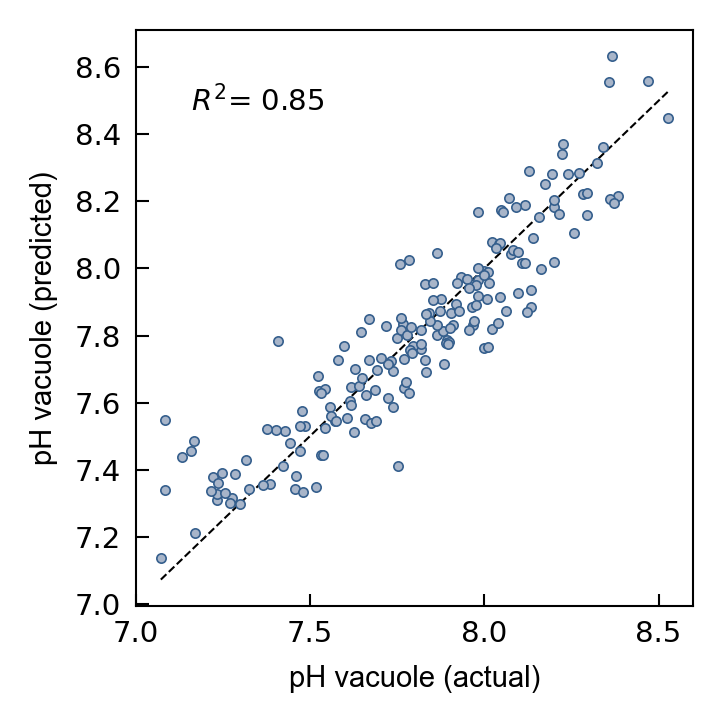

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable using the model
y_pred = model.predict(X_full)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Overall Mean Squared Error (MSE): {mse:.4f}")
print(f"Overall Coefficient of Determination (R²): {r2:.4f}")


fixed_width = 2.51
tentative_height = 2.51

cmap = plt.cm.viridis

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(fixed_width, tentative_height), dpi=300)


face_color = list(cmap(0.3))
face_color[0] = 0.66
face_color[1] = 0.71
face_color[2] = 0.79
face_color[3] = 1
face_color = tuple(face_color)
edge_color = cmap(0.3)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=0.5, zorder=1)  # Diagonal line

ax.scatter(y, y_pred, alpha=1, edgecolor=edge_color, facecolor = face_color, s=5, zorder=2, linewidths=0.4)

ax.text(0.1,0.86,fr'$R^2$= {r2:.2f}', transform = ax.transAxes, size='7')

ax.set_xlabel('pH vacuole (actual)', fontsize=7, fontname="Arial")
ax.set_ylabel('pH vacuole (predicted)', fontsize=7, fontname="Arial")
ax.tick_params(labelsize=7, axis='both', which='both', direction='in')


plt.tight_layout()

plt.savefig('Plots/SI model accuracy.svg', format='svg')
plt.savefig('Plots/SI model accuracy.pdf', format='pdf')
plt.savefig('Plots/SI model accuracy.png', format='png')


/home/lab/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



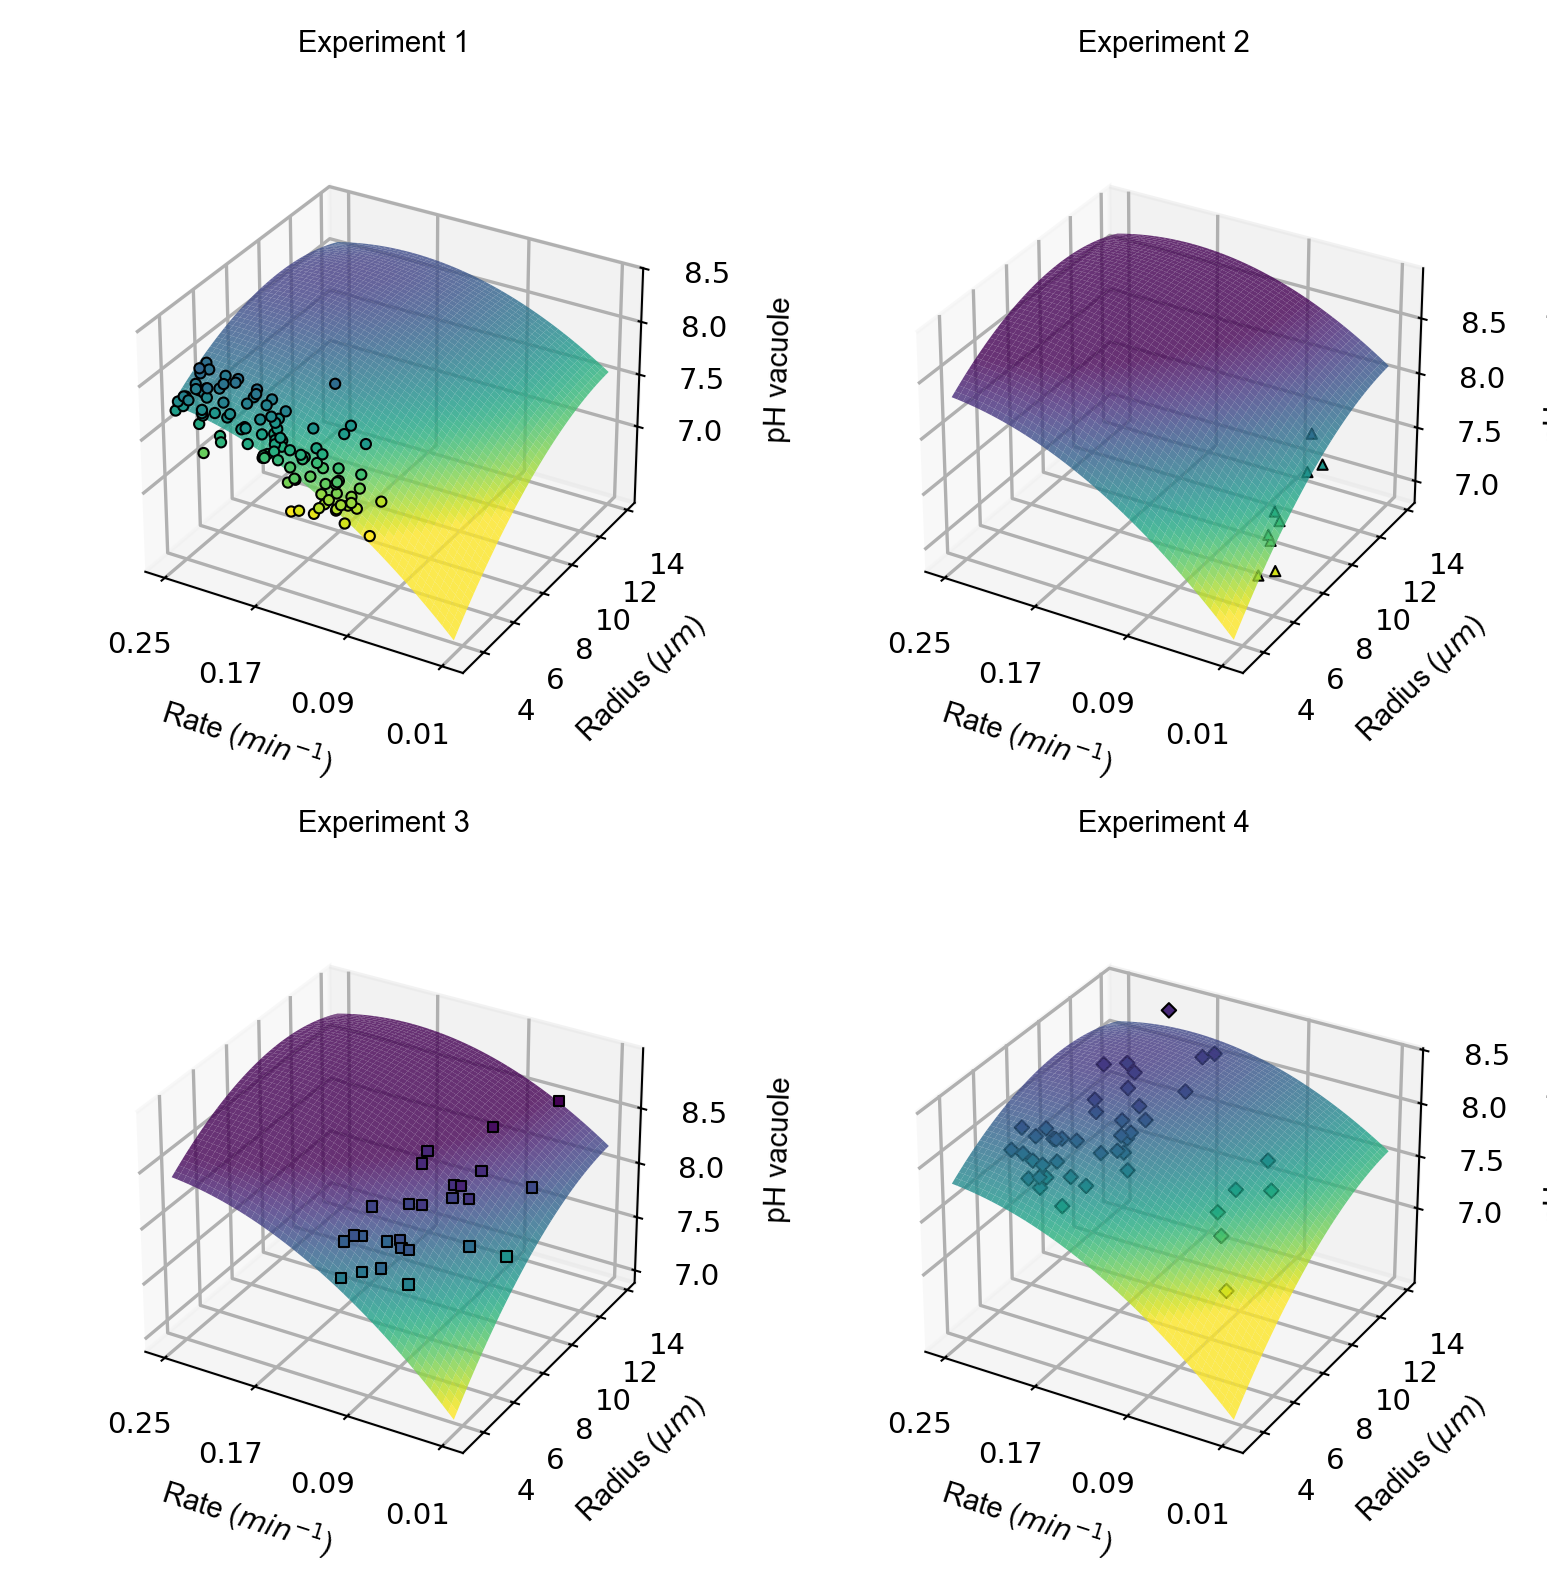

In [101]:
fixed_width = 2.6*2
tentative_height = 2.6*2

cmap = plt.cm.viridis_r


# Prepare the grid for prediction
radius_min, radius_max = fitting_df['radius'].min(), fitting_df['radius'].max()
rate_min, rate_max = fitting_df['rate(dpHdt)'].min(), fitting_df['rate(dpHdt)'].max()
ph_min, ph_max = fitting_df['pH_vacuole'].min(), fitting_df['pH_vacuole'].max()

radius_range = np.linspace(radius_min, radius_max, 50)
rate_range = np.linspace(rate_min, rate_max, 50)
RADIUS, RATE = np.meshgrid(radius_range, rate_range)
GRID = np.column_stack((RADIUS.ravel(), RATE.ravel()))

# Base polynomial features
GRID_POLY = poly.transform(GRID)

# Base coefficients (excluding dummy variables)
base_coefficients = np.array([coefficients_dict[name] for name in feature_names])

# Experiments to plot
experiments_to_plot = fitting_df['experiment'].unique()

# Create figure and subplots
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(fixed_width, tentative_height), dpi=300, constrained_layout=True)

axes = axes.ravel()
markers = ['o', '^', 's', 'D']
# Iterate over experiments and plot in subplots
for idx, experiment in enumerate(experiments_to_plot):
    ax = axes[idx]
    ax.view_init(elev=30, azim=-60)
    
    # Adjust the intercept
    adjusted_intercept = intercept + dummy_coefficients[experiment]

    # Prepare dummy variables for the grid
    grid_dummy = np.zeros((GRID.shape[0], len(dummy_names)))

    # Combine polynomial features and dummy variables
    GRID_FULL = np.concatenate([GRID_POLY, grid_dummy], axis=1)

    # Predict pH_vacuole
    y_pred_grid = adjusted_intercept + np.dot(GRID_FULL, coefficients)

    # Reshape predictions
    y_pred_grid = y_pred_grid.reshape(RADIUS.shape)

    # Add the surface plot
    surf = ax.plot_surface(RATE, RADIUS, y_pred_grid, cmap='viridis_r', alpha=0.8, vmin=ph_min, vmax=ph_max)
    
    # Add data points for the experiment with customized marker style
    exp_data = fitting_df[fitting_df['experiment'] == experiment]
    scatter_colors = cmap((exp_data['pH_vacuole'] - ph_min) / (ph_max - ph_min))
    ax.scatter(exp_data['rate(dpHdt)'], exp_data['radius'], exp_data['pH_vacuole'], c=scatter_colors, s=6, marker=markers[idx % len(markers)], edgecolors='k', alpha=1, linewidth=0.5)

    ax.set_title(f'Experiment {idx+1}', fontsize=7, fontname="Arial")
    
    rate_ticks = np.linspace(rate_min, rate_max, 4)  # Choose 5 ticks
    rate_tick_labels = [f"{abs(t)*60:.2f}" for t in rate_ticks]  # Absolute values
    ax.set_xticks(rate_ticks)
    ax.set_xticklabels(rate_tick_labels)
    ax.tick_params(labelsize=7)

    ax.set_xlabel(r'Rate ($min^{-1}$)', fontsize=7, fontname="Arial")
    ax.set_ylabel(r'Radius ($\mu m$)', fontsize=7, fontname="Arial")

# Define the desired z-axis tick values
z_ticks = [7, 7.5, 8, 8.5]

for ax in axes:
    ax.set_zlabel('pH vacuole', labelpad=5, fontsize=7, fontname="Arial")  # Adjust label spacing
    ax.set_zticks(z_ticks)  # Set z-axis ticks
    ax.set_box_aspect(None, zoom=0.8)


# plt.gcf().set_constrained_layout_pads(w_pad=2.0, h_pad=2.0, hspace=0.3, wspace=0.3)

plt.savefig('Plots/SI_model_surface.svg', format='svg')
plt.savefig('Plots/SI_model_surface.pdf', format='pdf')
plt.savefig('Plots/SI_model_surface.png', format='png')

plt.show()


In [102]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Prepare the grid for prediction
radius_min, radius_max = fitting_df['radius'].min(), fitting_df['radius'].max()
rate_min, rate_max = fitting_df['rate(dpHdt)'].min(), fitting_df['rate(dpHdt)'].max()

radius_range = np.linspace(radius_min, radius_max, 50)
rate_range = np.linspace(rate_min, rate_max, 50)
RADIUS, RATE = np.meshgrid(radius_range, rate_range)
GRID = np.column_stack((RADIUS.ravel(), RATE.ravel()))

# Base polynomial features
GRID_POLY = poly.transform(GRID)

# Base coefficients (excluding dummy variables)
base_coefficients = np.array([coefficients_dict[name] for name in feature_names])

# Experiments to plot
experiments_to_plot = fitting_df['experiment'].unique()

# Define subplot layout
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=[str(exp) for exp in experiments_to_plot],
                       specs=[[{'type': 'surface'}, {'type': 'surface'}],
                              [{'type': 'surface'}, {'type': 'surface'}]])

# For color scaling
global_min = 6.5
global_max = 9

markers = ['circle', 'diamond', 'square', 'x']

# Iterate over experiments and plot in subplots
for idx, experiment in enumerate(experiments_to_plot):
    row, col = divmod(idx, 2)  # Determine subplot location
    row += 1  # Plotly is 1-indexed for rows/cols
    col += 1
    
    # Adjust the intercept
    adjusted_intercept = intercept + dummy_coefficients[experiment]

    # Prepare dummy variables for the grid
    grid_dummy = np.zeros((GRID.shape[0], len(dummy_names)))

    # Combine polynomial features and dummy variables
    GRID_FULL = np.concatenate([GRID_POLY, grid_dummy], axis=1)

    # Predict pH_vacuole
    y_pred_grid = adjusted_intercept + np.dot(GRID_FULL, coefficients)

    # Reshape predictions
    y_pred_grid = y_pred_grid.reshape(RADIUS.shape)

    # Add the surface plot to subplot
    fig.add_trace(go.Surface(
        x=RATE, y=RADIUS, z=y_pred_grid,
        colorscale='Viridis', opacity=0.7,
        cmin=global_min, cmax=global_max, showscale=False
    ), row=row, col=col)

    # Add data points for the experiment
    exp_data = fitting_df[fitting_df['experiment'] == experiment]
    fig.add_trace(go.Scatter3d(
        x=exp_data['rate(dpHdt)'],
        y=exp_data['radius'],
        z=exp_data['pH_vacuole'],
        mode='markers',
        marker=dict(size=4, opacity=0.8, symbol=markers[idx]),
        name=f'{experiment}'
    ), row=row, col=col)

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Rate (dpH/dt)',
        yaxis_title='Radius',
        zaxis_title='pH_vacuole'
    ),
    title="Quadratic Regression Surfaces for Each Experiment",
    width=1000, height=900,
)

fig.show()


/home/lab/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



/home/lab/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

/home/lab/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

/home/lab/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



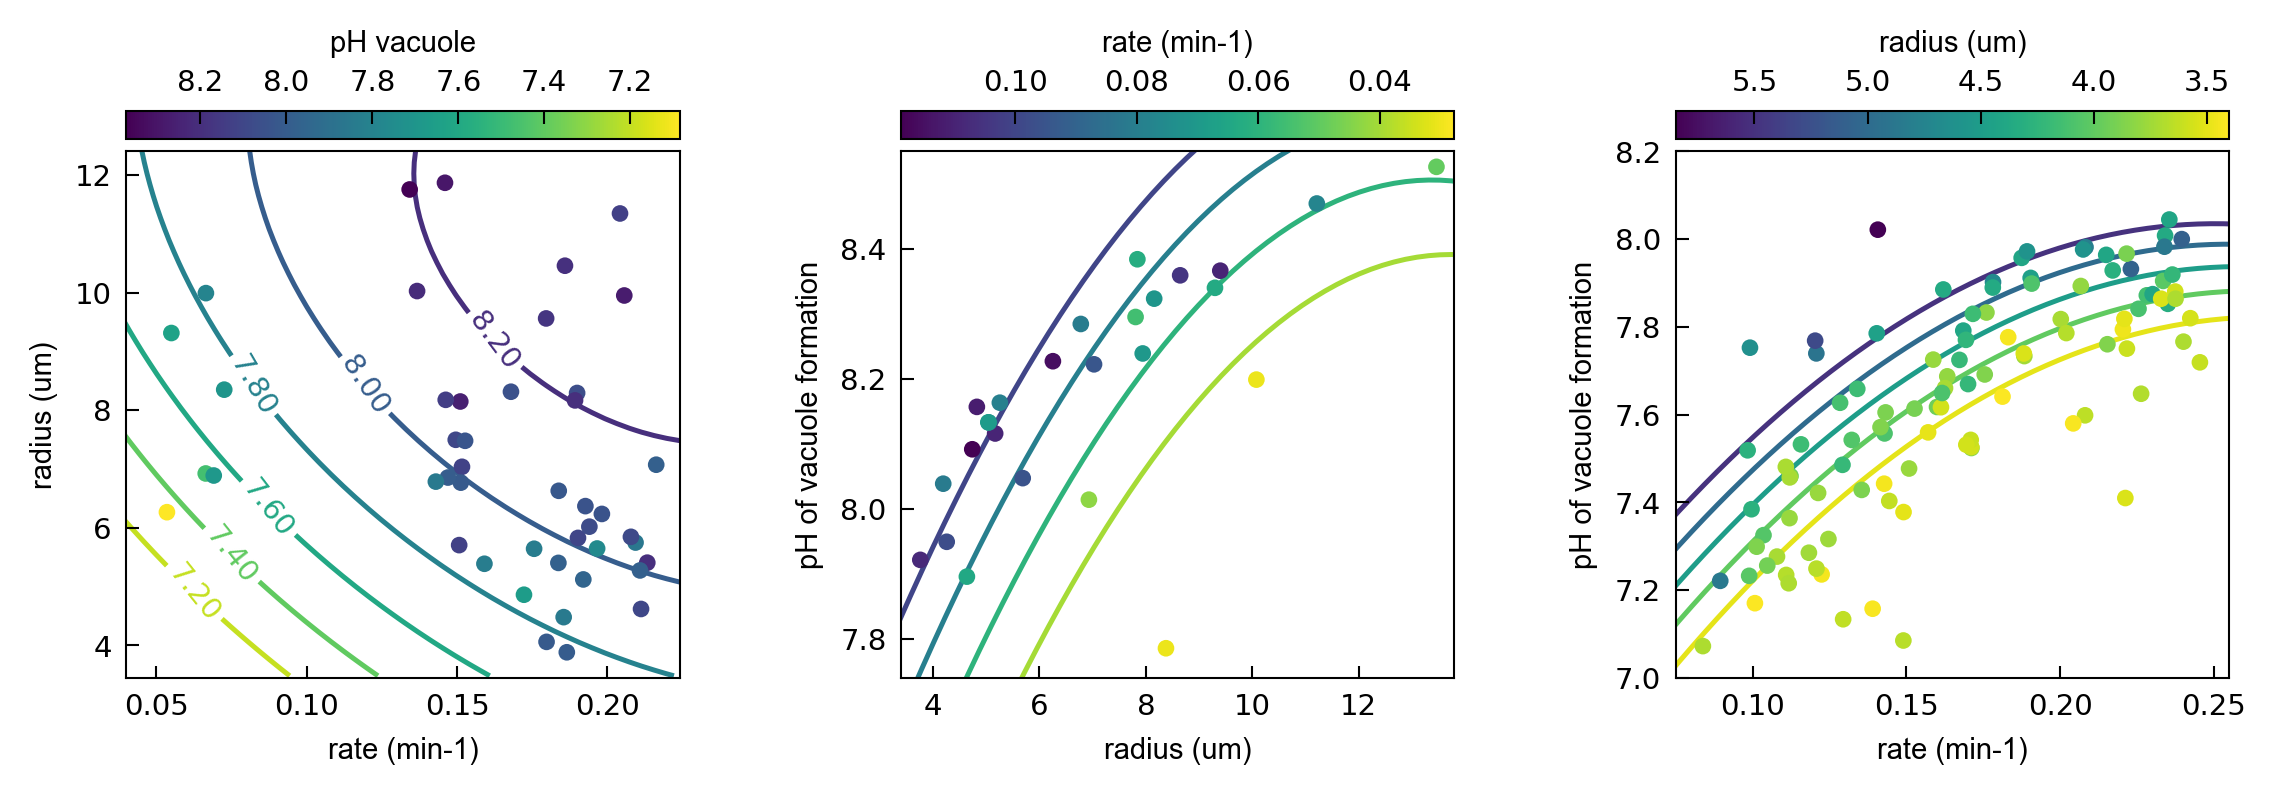

In [103]:
fixed_width = 2.51*3
tentative_height = 2.6

cmap = plt.cm.viridis_r

fig, ax = plt.subplots(ncols=3, figsize=(fixed_width, tentative_height), dpi=300)

exp_id = 3
figure_df = fitting_df.loc[fitting_df['experiment']==experiments[exp_id]].reset_index(drop=True)
radius_min, radius_max = figure_df['radius'].min(), figure_df['radius'].max()
rate_min, rate_max = figure_df['rate(dpHdt)'].min(), figure_df['rate(dpHdt)'].max()

radius_range = np.linspace(radius_min-0.4, radius_max-1, 50)
rate_range = np.linspace(rate_min-0.02/60, rate_max+0.02/60, 50)
RADIUS, RATE = np.meshgrid(radius_range, rate_range)
GRID = np.column_stack((RADIUS.ravel(), RATE.ravel()))
GRID_POLY = poly.transform(GRID)

adjusted_intercept = intercept + dummy_coefficients[experiments[exp_id]]
pH_vacuole_pred = adjusted_intercept + np.dot(GRID_POLY, coefficients[:5])
pH_vacuole_pred= pH_vacuole_pred.reshape(RADIUS.shape)

vmin_val = figure_df['pH_vacuole'].min()
vmax_val = figure_df['pH_vacuole'].max()

contour_levels = [7.2, 7.4, 7.6, 7.8, 8.0, 8.2]
contour = ax[0].contour(
    -RATE*60,
    RADIUS,
    pH_vacuole_pred,
    levels=contour_levels,
    cmap='viridis_r',
    linewidths=1.2,
    alpha=1,
    vmin=vmin_val,
    vmax=vmax_val,
    zorder=1
)
plt.clabel(contour, inline=True, fontsize=7, fmt="%.2f")

# contour
scatter = ax[0].scatter(
    -figure_df['rate(dpHdt)']*60,
    figure_df['radius'],
    c=figure_df['pH_vacuole'],
    cmap='viridis_r',
    edgecolor='none',
    alpha=1,
    s=16,
    vmin=vmin_val,
    vmax=vmax_val,
    zorder=2
)
cbar = plt.colorbar(scatter, ax=ax[0], orientation='horizontal', pad=0.02, location = 'top')
cbar.set_ticks([7.2, 7.4, 7.6, 7.8, 8.0, 8.2])
cbar.set_label('pH vacuole', fontsize=7, fontname="Arial")
ax[0].set_xlabel('rate (min-1)', fontsize=7, fontname="Arial")
ax[0].set_ylabel('radius (um)', fontsize=7, fontname="Arial")
ax[0].tick_params(labelsize=7, axis='both', which='both', direction='in')
cbar.ax.tick_params(labelsize=7, direction='in')
cbar.ax.invert_xaxis()
ax[0].set_ylim([3.45,12.4])
ax[0].set_xlim([0.04,0.224])
ax[0].set_yticks([4,6,8,10,12])

# fixed size

exp_id = 2
selected_experiments = ['24.04.01']

figure_df = fitting_df.loc[fitting_df['experiment']==experiments[exp_id]].reset_index(drop=True)
radius_min, radius_max = figure_df['radius'].min(), figure_df['radius'].max()
rate_min, rate_max = figure_df['rate(dpHdt)'].min(), figure_df['rate(dpHdt)'].max()
radius_range = np.linspace(radius_min-0.4, radius_max+0.5, 50)
rate_range = np.linspace(rate_min, rate_max, 50)
RADIUS, RATE = np.meshgrid(radius_range, rate_range)
GRID = np.column_stack((RADIUS.ravel(), RATE.ravel()))
GRID_POLY = poly.transform(GRID)

adjusted_intercept = intercept + dummy_coefficients[experiments[exp_id]]
pH_vacuole_pred = adjusted_intercept + np.dot(GRID_POLY, coefficients[:5])
pH_vacuole_pred= pH_vacuole_pred.reshape(RADIUS.shape)

filtered_data = filtered_drops[filtered_drops['experiment'].isin(selected_experiments)]

filtered_data_pH = filtered_drops.dropna(subset=['pH_vacuole_sigmap', 'pH_vacuole_sigmam'])
filtered_data_rate = filtered_drops.dropna(subset=['rate_sigma'])

vmin_val = -filtered_data['rate(dpHdt)'].max()*60
vmax_val = -filtered_data['rate(dpHdt)'].min()*60

contour = ax[1].contour(
    RADIUS,
    pH_vacuole_pred,
    -RATE*60,
    levels=4,  # Number of contour levels
    cmap='viridis_r',
    linewidths=1.2,
    alpha=1,
    vmin=vmin_val,
    vmax=vmax_val,
    zorder=1
)

# Add labels to the contours
# plt.clabel(contour, inline=True, fontsize=7, fmt="%.2f")
# cbar.ax.invert_yaxis()

scatter = ax[1].scatter(
        filtered_data['radius'], 
        filtered_data['pH_vacuole'], 
        c=-filtered_data['rate(dpHdt)']*60, 
        cmap='viridis_r', 
        edgecolor='none',
        alpha=1,
        s=16,
        vmin=vmin_val,
        vmax=vmax_val,
        zorder=2
    )
cbar = plt.colorbar(scatter, ax=ax[1], orientation='horizontal', pad=0.02, location = 'top')
cbar.set_label('rate (min-1)', fontsize=7, fontname="Arial")
ax[1].set_xlabel('radius (um)', fontsize=7, fontname="Arial")
ax[1].set_ylabel('pH of vacuole formation', fontsize=7, fontname="Arial")
ax[1].tick_params(labelsize=7, axis='both', which='both', direction='in')
cbar.ax.tick_params(labelsize=7, direction='in')
cbar.ax.invert_xaxis()
ax[1].set_ylim([7.74,8.55])
ax[1].set_xlim([3.4,13.8])
ax[1].set_yticks([7.8,8.0,8.2,8.4])


# fixed rate
selected_experiments = ['23.11.14-15']
exp_id = 0

figure_df = fitting_df.loc[fitting_df['experiment']==experiments[exp_id]].reset_index(drop=True)
radius_min, radius_max = figure_df['radius'].min(), figure_df['radius'].max()
rate_min, rate_max = figure_df['rate(dpHdt)'].min(), figure_df['rate(dpHdt)'].max()
radius_range = np.linspace(radius_min, radius_max, 50)
rate_range = np.linspace(rate_min-0.02/60, rate_max+0.02/60, 50)
RADIUS, RATE = np.meshgrid(radius_range, rate_range)
GRID = np.column_stack((RADIUS.ravel(), RATE.ravel()))
GRID_POLY = poly.transform(GRID)

# Adjust the intercept
adjusted_intercept = intercept + dummy_coefficients[experiments[exp_id]]
# Predict pH_vacuole
pH_vacuole_pred = adjusted_intercept + np.dot(GRID_POLY, coefficients[:5])
# Reshape predictions
pH_vacuole_pred= pH_vacuole_pred.reshape(RADIUS.shape)

filtered_data = filtered_drops[filtered_drops['experiment'].isin(selected_experiments)]
filtered_data_pH = filtered_data.dropna(subset=['pH_vacuole_sigmap', 'pH_vacuole_sigmam'])
filtered_data_rate = filtered_data.dropna(subset=['rate_sigma'])

vmin_val = filtered_data['radius'].min()
vmax_val = filtered_data['radius'].max()

contour = ax[2].contour(
    -RATE*60,
    pH_vacuole_pred,
    RADIUS,
    levels=4,  # Number of contour levels
    cmap='viridis_r',
    linewidths=1.2,
    alpha=1,
    vmin=vmin_val,
    vmax=vmax_val,
    zorder=1
)
# Add labels to the contours
# plt.clabel(contour, inline=True, fontsize=7, fmt="%.2f")
# cbar.ax.invert_yaxis()
scatter = ax[2].scatter(
        -filtered_data['rate(dpHdt)']*60, 
        filtered_data['pH_vacuole'], 
        c=filtered_data['radius'], 
        cmap='viridis_r', 
        edgecolor='none',
        alpha=1,
        s=16,
        vmin=vmin_val,
        vmax=vmax_val,
        zorder=2
    )
cbar = plt.colorbar(scatter, ax=ax[2], orientation='horizontal', pad=0.02, location = 'top')
cbar.set_label('radius (um)', fontsize=7, fontname="Arial")
ax[2].set_xlabel('rate (min-1)', fontsize=7, fontname="Arial")
ax[2].set_ylabel('pH of vacuole formation', fontsize=7, fontname="Arial")
ax[2].tick_params(labelsize=7, axis='both', which='both', direction='in')
cbar.ax.tick_params(labelsize=7, direction='in')
cbar.ax.invert_xaxis()
ax[2].set_ylim([7,8.2])
ax[2].set_xlim([0.075,0.255])

plt.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0.4)
current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)

plt.savefig('Plots/Fig 3 pH of vacuole formation.svg', format='svg')
plt.savefig('Plots/Fig 3 pH of vacuole formation.pdf', format='pdf')
plt.savefig('Plots/Fig 3 pH of vacuole formation.png', format='png')


# Figure 4 - New python notebook (figure4.ipynb for new analysis with correct scaling)

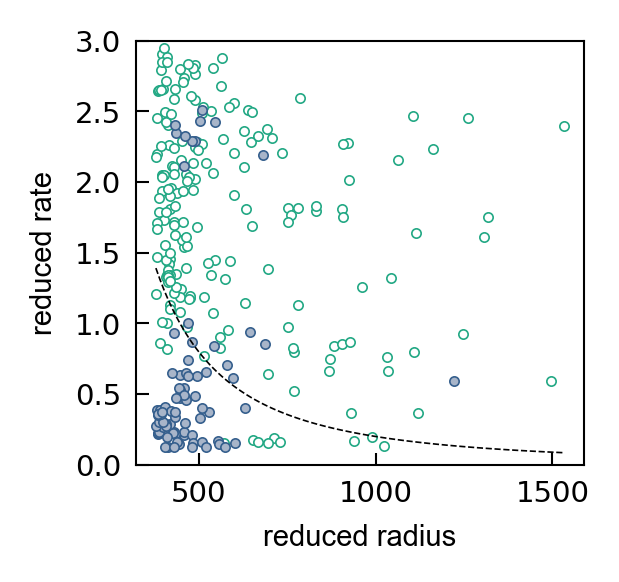

In [83]:
######################
# SCALES
###########
length_scale = 9e-9
time_scale = 12 # minutes
###########
######################

df_plot = filtered_drops.dropna(subset=['particle', 'rate(dpHdt)', 'radius'])
df_plot = df_plot[df_plot['experiment'].isin(experiments)]

fixed_width = 2
tentative_height = 1.88

cmap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(fixed_width, tentative_height), dpi=300)

# Create face color & edge color (RGBA), face color has alpha=0.7
# e.g. cmap(0.3) returns an RGBA tuple. We'll manually update the alpha.
face_color_no_vacuole = list(cmap(0.3))
face_color_no_vacuole[3] = 1  # Face alpha = 0.7
face_color_no_vacuole[0] = 0.66
face_color_no_vacuole[1] = 0.71
face_color_no_vacuole[2] = 0.79
face_color_no_vacuole = tuple(face_color_no_vacuole)

edge_color_no_vacuole = cmap(0.3)  # Remains fully opaque

reduced_radius = df_plot[df_plot['vacuole'] == 0]['radius']*1e-6/length_scale
reduced_rate = -df_plot[df_plot['vacuole'] == 0]['rate(dpHdt)']*60*time_scale

ax.scatter(
    reduced_radius,
    reduced_rate,
    facecolor=face_color_no_vacuole,
    edgecolor=edge_color_no_vacuole,
    label='no vacuole',
    linewidths=0.4,
    s=5,
    zorder=2
)

# Repeat for vacuole=1 with a different color index, e.g. cmap(0.6)
face_color_vacuole = list(cmap(0.6))
face_color_vacuole[3] = 0.7  # Face alpha = 0.7
face_color_vacuole = tuple(face_color_vacuole)

edge_color_vacuole = cmap(0.6)  # fully opaque edges

reduced_radius = df_plot[df_plot['vacuole'] == 1]['radius']*1e-6/length_scale
reduced_rate = -df_plot[df_plot['vacuole'] == 1]['rate(dpHdt)']*60*time_scale

ax.scatter(
    reduced_radius,
    reduced_rate,
    facecolor='white',
    edgecolor=edge_color_vacuole,
    label='vacuole',
    linewidths=0.4,
    s=5,
    zorder=1
)

# ax.set_xlabel(r'radius ($\mu m$)', fontsize=7, fontname="Arial")
# ax.set_ylabel(r'rate (min$^{-1}$)', fontsize=7, fontname="Arial")

ax.set_xlabel(r'reduced radius', fontsize=7, fontname="Arial")
ax.set_ylabel(r'reduced rate', fontsize=7, fontname="Arial")

ax.tick_params(labelsize=7, direction='in')
ax.set_ylim([0,3])

# plt.loglog()
# plt.plot(np.linspace(3400,10000,100), 12e10*0.0001*np.linspace(3400,10000,100)**-2, linestyle='--', color='k', alpha=1, linewidth=0.4)
plt.plot(np.linspace(reduced_radius.min(),reduced_radius.max(),100), 2e5*np.linspace(reduced_radius.min(),reduced_radius.max(),100)**-2, linestyle='--', color='k', alpha=1, linewidth=0.4)

plt.tight_layout(pad=0.5)

current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)

plt.savefig('Fig 4 exp phase space.svg', format='svg')
plt.savefig('Fig 4 exp phase space.pdf', format='pdf')
plt.savefig('Fig 4 exp phase space.png', format='png')


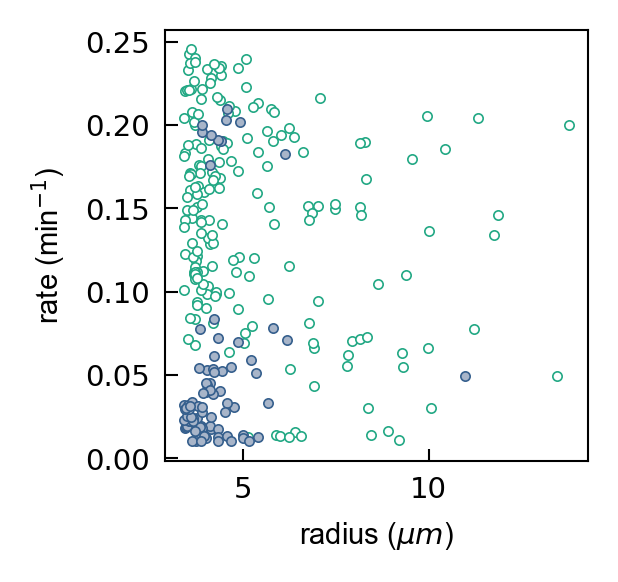

In [105]:
######################
# SCALES
###########
length_scale = 9e-9
time_scale = 12 # minutes
###########
######################

df_plot = filtered_drops.dropna(subset=['particle', 'rate(dpHdt)', 'radius'])
df_plot = df_plot[df_plot['experiment'].isin(experiments)]

fixed_width = 2
tentative_height = 1.88

cmap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(fixed_width, tentative_height), dpi=300)

# Create face color & edge color (RGBA), face color has alpha=0.7
# e.g. cmap(0.3) returns an RGBA tuple. We'll manually update the alpha.
face_color_no_vacuole = list(cmap(0.3))
face_color_no_vacuole[3] = 1  # Face alpha = 0.7
face_color_no_vacuole[0] = 0.66
face_color_no_vacuole[1] = 0.71
face_color_no_vacuole[2] = 0.79
face_color_no_vacuole = tuple(face_color_no_vacuole)

edge_color_no_vacuole = cmap(0.3)  # Remains fully opaque

ax.scatter(
    df_plot[df_plot['vacuole'] == 0]['radius'],
    -df_plot[df_plot['vacuole'] == 0]['rate(dpHdt)']*60,
    facecolor=face_color_no_vacuole,
    edgecolor=edge_color_no_vacuole,
    label='no vacuole',
    linewidths=0.4,
    s=5,
    zorder=2
)

# Repeat for vacuole=1 with a different color index, e.g. cmap(0.6)
face_color_vacuole = list(cmap(0.6))
face_color_vacuole[3] = 0.7  # Face alpha = 0.7
face_color_vacuole = tuple(face_color_vacuole)

edge_color_vacuole = cmap(0.6)  # fully opaque edges

ax.scatter(
    df_plot[df_plot['vacuole'] == 1]['radius'],
    -df_plot[df_plot['vacuole'] == 1]['rate(dpHdt)']*60,
    facecolor='white',
    edgecolor=edge_color_vacuole,
    label='vacuole',
    linewidths=0.4,
    s=5,
    zorder=1
)

ax.set_xlabel(r'radius ($\mu m$)', fontsize=7, fontname="Arial")
ax.set_ylabel(r'rate (min$^{-1}$)', fontsize=7, fontname="Arial")

ax.tick_params(labelsize=7, direction='in')

plt.tight_layout(pad=0.5)

current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)

plt.savefig('Plots/SI exp phase space.svg', format='svg')
plt.savefig('Plots/SI exp phase space.pdf', format='pdf')
plt.savefig('Plots/SI exp phase space.png', format='png')


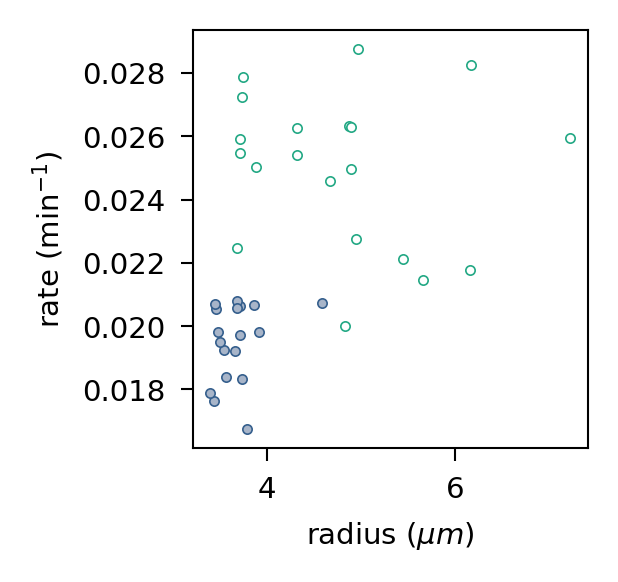

In [106]:
df_plot = droplets_all.dropna(subset=['particle', 'rate(dpHdt)', 'radius'])
df_plot = df_plot[df_plot['radius']>min_radius]
df_plot = df_plot[df_plot['experiment'].isin(asym_expt)]

fixed_width = 2
tentative_height = 1.88

cmap = plt.cm.viridis
fig, ax = plt.subplots(figsize=(fixed_width, tentative_height), dpi=300)

ax.scatter(
    df_plot[df_plot['vacuole'] == 0]['radius'],
    -df_plot[df_plot['vacuole'] == 0]['rate(dpHdt)']*60,
    facecolor=face_color_no_vacuole,
    edgecolor=edge_color_no_vacuole,
    label='no vacuole',
    linewidths=0.4,
    s=5,
    zorder=2
)
ax.scatter(
    df_plot[df_plot['vacuole'] == 1]['radius'],
    -df_plot[df_plot['vacuole'] == 1]['rate(dpHdt)']*60,
    facecolor='white',
    edgecolor=edge_color_vacuole,
    label='vacuole',
    linewidths=0.4,
    s=5,
    zorder=1
)

ax.set_xlabel(r'radius ($\mu m$)', fontsize=7)
ax.set_ylabel(r'rate (min$^{-1}$)', fontsize=7)
# ax.legend(fontsize=7)
ax.tick_params(labelsize=7)


plt.tight_layout(pad=0.5)

current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)

plt.savefig('Plots/SI Asymptotic Experiments.svg', format='svg')
plt.savefig('Plots/SI Asymptotic Experiments.pdf', format='pdf')
plt.savefig('Plots/SI Asymptotic Experiments.png', format='png')

